<a href="https://colab.research.google.com/github/harddy-bit/Forest-Fire-Regression-TF2/blob/main/Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Forest Fire Regression/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
data.shape

(517, 13)

In [ ]:
vars=['month','day']
for col in vars:
  dummy=pd.get_dummies(data[col],drop_first=True,prefix=col)
  data=pd.concat([data,dummy],axis=1)
  del data[col]
  print(col)
del dummy 

month
day


In [ ]:
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.shape

(517, 28)

In [ ]:
X=data.drop(['area'],axis=1)
y=data['area']

In [ ]:
X.shape

(517, 27)

In [ ]:
y.nunique()

251

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")

In [ ]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid))

Epoch 1/500
10/10 [==============================] - 0s 12ms/step - loss: 2907.8376 - val_loss: 665.2264
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 2899.4951 - val_loss: 657.2114
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 2885.1968 - val_loss: 646.1429
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 2869.0471 - val_loss: 632.1224
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 2847.4751 - val_loss: 616.6462
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 2819.7666 - val_loss: 602.5608
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 2788.9224 - val_loss: 592.8764
Epoch 8/500
10/10 [==============================] - 0s 3ms/step - loss: 2759.5811 - val_loss: 588.7501
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 2730.7417 - val_loss: 589.7885
Epoch 10/500
10/10 [==============================] - 0s 3ms/st

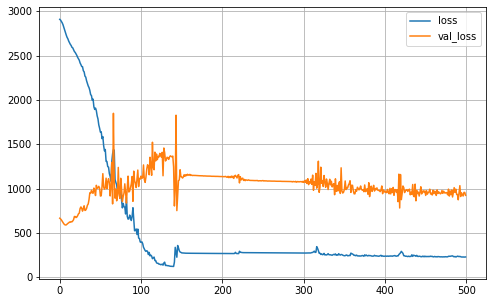

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

15.033327935905465
100.19805920919435
